In [1]:
# pip install gensim

In [2]:
%config Completer.use_jedi = False


### Simple topic identification

In [3]:
f = open('data/Introduction to NLP in python/monty_python.txt', 'r')
holy_grail = f.read()

scene_one = holy_grail.split('SCENE')[1]


In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize

sentences = sent_tokenize(scene_one)

tokenized_sent = word_tokenize(scene_one)

unique_tokens = set(word_tokenize(scene_one))

unique_tokens

{'!',
 '#',
 "'",
 "'d",
 "'em",
 "'m",
 "'re",
 "'s",
 "'ve",
 ',',
 '--',
 '.',
 '...',
 '1',
 '2',
 ':',
 '?',
 'A',
 'ARTHUR',
 'African',
 'Am',
 'Are',
 'Arthur',
 'Britons',
 'But',
 'Camelot',
 'Court',
 'England',
 'European',
 'Found',
 'Halt',
 'I',
 'In',
 'It',
 'KING',
 'King',
 'Listen',
 'Mercea',
 'No',
 'Not',
 'Oh',
 'Patsy',
 'Pendragon',
 'Please',
 'Pull',
 'Ridden',
 'SOLDIER',
 'Saxons',
 'So',
 'Supposing',
 'That',
 'The',
 'They',
 'Uther',
 'Wait',
 'We',
 'Well',
 'What',
 'Where',
 'Who',
 'Whoa',
 'Will',
 'Yes',
 'You',
 '[',
 ']',
 'a',
 'agree',
 'air-speed',
 'all',
 'am',
 'an',
 'and',
 'anyway',
 'are',
 'ask',
 'at',
 'back',
 'bangin',
 'be',
 'beat',
 'bird',
 'breadth',
 'bring',
 'but',
 'by',
 'carried',
 'carry',
 'carrying',
 'castle',
 'climes',
 'clop',
 'coconut',
 'coconuts',
 'could',
 'course',
 'court',
 'covered',
 'creeper',
 'defeator',
 'do',
 'does',
 'dorsal',
 'empty',
 'every',
 'feathers',
 'five',
 'fly',
 'forty-three',
 '

In [5]:
import re

match = re.search('coconuts', scene_one)

print(match.start(), match.end())

575 583


In [6]:
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

In [7]:
import matplotlib.pyplot as plt

In [8]:
from collections import Counter

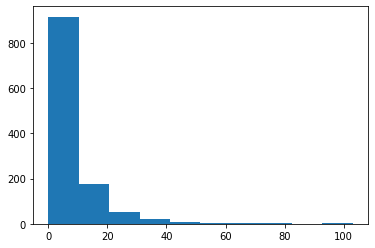

In [9]:
# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, r"\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

In [36]:
f = open('data/Introduction to NLP in python/wiki_text_debugging.txt', 'r')
article = f.read()

f2 = open('data/Introduction to NLP in python/stopwords.txt', 'r')
english_stops = f2.read().split('\n')


tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 66), ('to', 63), ('a', 60), ('``', 47), ('in', 44), ('and', 41)]


In [11]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))


[('debugging', 40), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]


In [37]:
import os
PATH = 'data/Introduction to NLP in python/'
files = os.listdir(PATH)
wiki_articles_raw = [open(PATH+file, 'r').read().lower() for file in files if 'wiki' in file]
len(wiki_articles_raw)

12

In [38]:
tokens = [word_tokenize(article) for article in wiki_articles_raw]

tokens

[["'",
  "''",
  'exception',
  'handling',
  "''",
  "'",
  'is',
  'the',
  'process',
  'of',
  'responding',
  'to',
  'the',
  'occurrence',
  ',',
  'during',
  'computation',
  ',',
  'of',
  '``',
  'exceptions',
  "''",
  '–',
  'anomalous',
  'or',
  'exceptional',
  'conditions',
  'requiring',
  'special',
  'processing',
  '–',
  'often',
  'changing',
  'the',
  'normal',
  'flow',
  'of',
  'computer',
  'program|program',
  'execution',
  '(',
  'computing',
  ')',
  '|execution',
  '.',
  'it',
  'is',
  'provided',
  'by',
  'specialized',
  'programming',
  'language',
  'constructs',
  'or',
  'computer',
  'hardware',
  'mechanisms',
  '.',
  'in',
  'general',
  ',',
  'an',
  'exception',
  'breaks',
  'the',
  'normal',
  'flow',
  'of',
  'execution',
  'and',
  'executes',
  'a',
  'pre-registered',
  '``',
  'exception',
  'handler',
  "''",
  '.',
  'the',
  'details',
  'of',
  'how',
  'this',
  'is',
  'done',
  'depends',
  'on',
  'whether',
  'it',
  '

In [39]:
    english_stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [43]:
clean_articles = []
for article in tokens:
    alpha_only = [t for t in article if t.isalpha()]
    lower = [t.lower() for t in alpha_only]
    no_stop = [t for t in lower if t not in english_stops]
    clean_articles.append(no_stop)
    
clean_articles
    

[['exception',
  'handling',
  'process',
  'responding',
  'occurrence',
  'computation',
  'exceptions',
  'anomalous',
  'exceptional',
  'conditions',
  'requiring',
  'special',
  'processing',
  'often',
  'changing',
  'normal',
  'flow',
  'computer',
  'execution',
  'computing',
  'provided',
  'specialized',
  'programming',
  'language',
  'constructs',
  'computer',
  'hardware',
  'mechanisms',
  'general',
  'exception',
  'breaks',
  'normal',
  'flow',
  'execution',
  'executes',
  'exception',
  'handler',
  'details',
  'done',
  'depends',
  'whether',
  'hardware',
  'software',
  'exception',
  'software',
  'exception',
  'implemented',
  'exceptions',
  'especially',
  'hardware',
  'ones',
  'may',
  'handled',
  'gracefully',
  'execution',
  'resume',
  'interrupted',
  'alternative',
  'approaches',
  'exception',
  'handling',
  'software',
  'error',
  'checking',
  'maintains',
  'normal',
  'program',
  'flow',
  'later',
  'explicit',
  'checks',
  'co

In [44]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(clean_articles)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in clean_articles]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])



computer
[(20, 2), (24, 1), (28, 1), (35, 4), (36, 1), (38, 1), (43, 5), (49, 1), (50, 1), (60, 4)]


In [45]:
from collections import defaultdict
import itertools

total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
    
# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

computer 598
software 450
cite 322
ref 259
code 235


In [49]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(corpus)

tfidf_weights = tfidf[corpus[1]]

# tfidf_weights[:5]

sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:10]:
    print(dictionary.get(term_id), weight)

reverse 0.5469505229447056
infringement 0.2033630531933049
engineering 0.17853974914598997
interoperability 0.13557536879553658
missile 0.1186284476960945
knowledge 0.10399893000630442
learning 0.08553787905772492
chikofsky 0.08473460549721036
competitor 0.08473460549721036
directive 0.08473460549721036


### Named-entity recognition (NER)